#Data Exploration and Visualization
###February 4, 2015

In [2]:
# pylab inline (either in the notebook or as an argument starting the notebook)
# will by default load numpy as np and matplotlib.pylab as plt
# Let's import everything else we used last time as well:

import pandas as pd
import seaborn as sns
from __future__ import division
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.mpl_style = 'default'

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

In [5]:
columns = """-- The attributes are (dontated by Riccardo Leardi, 
    riclea@anchem.unige.it )
    1) Alcohol
    2) Malic acid
    3) Ash
    4) Alcalinity of ash  
    5) Magnesium
    6) Total phenols
    7) Flavanoids
    8) Nonflavanoid phenols
    9) Proanthocyanins
    10)Color intensity
    11)Hue
    12)OD280/OD315 of diluted wines
    13)Proline"""

# we can generate the columns list using some string and list functions.
columns = columns.split('\n')
columns = [i.strip() for i in columns][2:]
columns = [i.split(')')[1].strip().lower() for i in columns]
cols = ['class']
cols.extend(columns)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine = pd.read_csv(url, header=None)
wine.columns = cols
wine.head()

,class,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,od280/od315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# Create a groupby object:
winegroups = wine.groupby('class')
print type(winegroups)

# groupby objects allow for some standard pandas calls:

winegroups.describe()

<class 'pandas.core.groupby.DataFrameGroupBy'>


alcalinity of ash    alcohol        ash  color intensity  flavanoids        hue   magnesium  malic acid  nonflavanoid phenols  od280/od315 of diluted wines  proanthocyanins      proline  total phenols
class                                                                                                                                                                                                                
1     count          59.000000  59.000000  59.000000        59.000000   59.000000  59.000000   59.000000   59.000000             59.000000                     59.000000        59.000000    59.000000      59.000000
      mean           17.037288  13.744746   2.455593         5.528305    2.982373   1.062034  106.338983    2.010678              0.290000                      3.157797         1.899322  1115.711864       2.840169
      std             2.546322   0.462125   0.227166         1.238573    0.397494   0.116483   10.498949    0.688549              0.070049                      0.357077         0.412109   221.520767       0.338961
      min            11.200000  12.850000   2.040000         3.520000    2.190000   0.820000   89.000000    1.350000              0.170000                      2.510000         1.250000   680.000000       2.200000
      25%            16.000000  13.400000   2.295000         4.550000    2.680000   0.995000   98.000000    1.665000              0.255000                      2.870000         1.640000   987.500000       2.600000
      50%            16.800000  13.750000   2.440000         5.400000    2.980000   1.070000  104.000000    1.770000              0.290000                      3.170000         1.870000  1095.000000       2.800000
      75%            18.700000  14.100000   2.615000         6.225000    3.245000   1.130000  114.000000    1.935000              0.320000                      3.420000         2.090000  1280.000000       3.000000
      max            25.000000  14.830000   3.220000         8.900000    3.930000   1.280000  132.000000    4.040000              0.500000                      4.000000         2.960000  1680.000000       3.880000
2     count          71.000000  71.000000  71.000000        71.000000   71.000000  71.000000   71.000000   71.000000             71.000000                     71.000000        71.000000    71.000000      71.000000
      mean           20.238028  12.278732   2.244789         3.086620    2.080845   1.056282   94.549296    1.932676              0.363662                      2.785352         1.630282   519.507042       2.258873
      std             3.349770   0.537964   0.315467         0.924929    0.705701   0.202937   16.753497    1.015569              0.123961                      0.496573         0.602068   157.211220       0.545361
      min            10.600000  11.030000   1.360000         1.280000    0.570000   0.690000   70.000000    0.740000              0.130000                      1.590000         0.410000   278.000000       1.100000
      25%            18.000000  11.915000   2.000000         2.535000    1.605000   0.925000   85.500000    1.270000              0.270000                      2.440000         1.350000   406.500000       1.895000
      50%            20.000000  12.290000   2.240000         2.900000    2.030000   1.040000   88.000000    1.610000              0.370000                      2.830000         1.610000   495.000000       2.200000
      75%            22.000000  12.515000   2.420000         3.400000    2.475000   1.205000   99.500000    2.145000              0.430000                      3.160000         1.885000   625.000000       2.560000
      max            30.000000  13.860000   3.230000         6.000000    5.080000   1.710000  162.000000    5.800000              0.660000                      3.690000         3.580000   985.000000       3.520000
3     count          48.000000  48.000000  48.000000        48.000000   48.000000  48.000000   48.000000   48.000000             48.000000                     48

In [10]:
#Simpler example of the above with just the mean
print type(wine.groupby('class').ash.mean())
print wine.groupby('class').ash.mean()

<class 'pandas.core.series.Series'>
class
1        2.455593
2        2.244789
3        2.437083
Name: ash, dtype: float64


In [11]:
# Groupby objects also:
## can work through selected columns

print winegroups.alcohol.mean()
print winegroups[['alcohol', 'ash']].median()

## can work through aggregation dictionaries, which can reference the origin
## groupby functions, or construct new functions.

print winegroups.agg({'alcohol': 'median'})
print winegroups.agg({'alcohol': lambda alcohol: alcohol.nunique() / alcohol.count()})

class
1        13.744746
2        12.278732
3        13.153750
Name: alcohol, dtype: float64
       alcohol   ash
class               
1       13.750  2.44
2       12.290  2.24
3       13.165  2.38
       alcohol
class         
1       13.750
2       12.290
3       13.165
        alcohol
class          
1      0.830508
2      0.704225
3      0.937500


In [12]:
pivoted_wine = wine.pivot_table(values='ash',
                 columns='class',
                 index='alcohol',
                 aggfunc='count')


In [13]:
# Transposing between the two types - pivot and group by
pivoted_wine_reset = pivoted_wine.reset_index() # reset index takes a multi index or a single index and converts to columns
print pivoted_wine_reset.head()

print pd.melt(pivoted_wine_reset,
              id_vars=['alcohol'],
              value_vars=[1, 2, 3],
              value_name='count').dropna().head(20)

class  alcohol   1  2   3
0        11.03 NaN  1 NaN
1        11.41 NaN  1 NaN
2        11.45 NaN  1 NaN
3        11.46 NaN  1 NaN
4        11.56 NaN  1 NaN
    alcohol class  count
51    12.85     1      1
55    12.93     1      1
59    13.05     1      4
60    13.07     1      1
63    13.16     1      1
65    13.20     1      1
67    13.24     1      2
69    13.28     1      1
70    13.29     1      1
71    13.30     1      1
75    13.39     1      1
77    13.41     1      1
79    13.48     1      1
81    13.50     1      1
82    13.51     1      1
84    13.56     1      2
85    13.58     1      1
87    13.63     1      1
88    13.64     1      1
90    13.68     1      1


In [14]:
#This time, create a group by object on a rounded 'alcohol' field. You might want to break this out into:
#create a new column with the rounded alcohol content

wine['rd_alc'] = wine.alcohol.round()

In [17]:
#groupby on the new column
#Explore the statistics from .describe() in this new groupby object. Across the new groups, what is interesting? What isn't?

wine_grp_rd = wine.groupby('rd_alc')
wine_grp_rd.describe()

alcalinity of ash    alcohol        ash      class  color intensity  flavanoids        hue   magnesium  malic acid  nonflavanoid phenols  od280/od315 of diluted wines  proanthocyanins      proline  total phenols
rd_alc                                                                                                                                                                                                                           
11     count           4.000000   4.000000   4.000000   4.000000         4.000000    4.000000   4.000000    4.000000    4.000000              4.000000                      4.000000         4.000000     4.000000       4.000000
       mean           20.500000  11.337500   2.235000   2.000000         2.782500    2.387500   1.090000   94.000000    2.097500              0.375000                      2.845000         2.215000   507.000000       2.755000
       std             0.912871   0.206135   0.304357   0.000000         0.605441    0.360035   0.441286    9.831921    1.288057              0.121518                      0.441626         0.940585   103.727206       0.348473
       min            19.500000  11.030000   1.820000   2.000000         1.900000    2.010000   0.750000   85.000000    0.740000              0.240000                      2.310000         1.440000   407.000000       2.460000
       25%            19.875000  11.315000   2.105000   2.000000         2.650000    2.130000   0.787500   87.250000    1.317500              0.300000                      2.685000         1.732500   427.250000       2.475000
       50%            20.500000  11.430000   2.310000   2.000000         2.990000    2.375000   0.950000   92.000000    1.955000              0.370000                      2.840000         1.920000   498.000000       2.690000
       75%            21.125000  11.452500   2.440000   2.000000         3.122500    2.632500   1.252500   98.750000    2.735000              0.445000                      3.000000         2.402500   577.750000       2.970000
       max            21.500000  11.460000   2.500000   2.000000         3.250000    2.790000   1.710000  107.000000    3.740000              0.520000                      3.390000         3.580000   625.000000       3.180000
12     count          53.000000  53.000000  53.000000  53.000000        53.000000   53.000000  53.000000   53.000000   53.000000             53.000000                     53.000000        53.000000    53.000000      53.000000
       mean           20.313208  12.109811   2.291321   2.094340         3.283208    1.940566   1.020113   95.792453    2.046981              0.373962                      2.706604         1.593019   534.245283       2.184340
       std             3.341524   0.265384   0.324405   0.295098         1.440304    0.843863   0.215290   17.502042    1.014742              0.126800                      0.567647         0.590455   169.797153       0.552541
       min            10.600000  11.560000   1.360000   2.000000         1.280000    0.470000   0.560000   70.000000    0.890000              0.130000                      1.270000         0.410000   278.000000       1.100000
       25%            18.500000  11.870000   2.120000   2.000000         2.500000    1.570000   0.890000   86.000000    1.330000              0.290000                      2.300000         1.310000   406.000000       1.850000
       50%            20.000000  12.170000   2.290000   2.000000         2.850000    2.000000   1.000000   90.000000    1.670000              0.370000                      2.780000         1.530000   510.000000       2.110000
       75%            22.000000  12.340000   2.500000   2.000000         3.600000    2.260000   1.190000  101.000000    2.550000              0.430000                      3.130000         1.870000   660.000000       2.500000
       max            28.500000  12.470000   3.230000   3.000000         8.210000    5.080000   1.450000  162.000000    4.720000              0.660000                      

In [21]:
#Use a pivot table to show the count of each target type per rounded alcohol level.
pivoted_wine_rd = wine.pivot_table(values='ash',
                 columns='class',
                 index='rd_alc',
                 aggfunc='count')
print pivoted_wine_rd

class    1   2   3
rd_alc            
11     NaN   4 NaN
12     NaN  48   5
13      17  17  30
14      40   2  13
15       2 NaN NaN


In [24]:
#Finally, melt the pivot table so that the columns represent each grouping and a count of that group.
#take a step back What would be the groupby() code to create the same data frame you created in question 4?
pivoted_wine_rd_reset = pivoted_wine_rd.reset_index()
print pd.melt(pivoted_wine_rd_reset,
              id_vars=['rd_alc'],
              value_vars=[1, 2, 3],
              value_name='count').dropna()

    rd_alc class  count
2       13     1     17
3       14     1     40
4       15     1      2
5       11     2      4
6       12     2     48
7       13     2     17
8       14     2      2
11      12     3      5
12      13     3     30
13      14     3     13


In [26]:
import sqlite3

In [27]:
pwd

u'/Users/duncanfraser/anaconda/bin'

In [28]:
con = sqlite3.connect("../../DAT18NYC/data/lahman.sqlite")
df = pd.read_sql("SELECT * from batting", con)
df = df.convert_objects(convert_numeric=True)

# Reminder: Many functions from data frames will work on groupby objects!
# What is below doing?
df.groupby('year').head(1)

,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,abercda01,1871,1,TRO,NA,1,4,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
115,allenha01,1872,1,MID,NA,16,66,8,18,1,0,0,7,0,0,0,1,NaN,NaN,NaN,NaN,NaN
271,addybo01,1873,1,PH2,NA,10,51,12,16,1,0,0,10,0,1,2,0,NaN,NaN,NaN,NaN,NaN
396,addybo01,1874,1,HR1,NA,50,213,25,51,9,2,0,23,4,2,1,0,NaN,NaN,NaN,NaN,NaN
519,abadijo01,1875,1,PH3,NA,11,45,3,10,0,0,0,4,1,0,0,3,NaN,NaN,NaN,NaN,NaN
737,addybo01,1876,1,CHN,NL,32,142,36,40,4,1,0,16,NaN,NaN,5,0,NaN,NaN,NaN,NaN,NaN
861,addybo01,1877,1,CN1,NL,57,245,27,68,2,3,0,31,NaN,NaN,6,5,NaN,NaN,NaN,NaN,NaN
958,allisdo01,1878,1,PRO,NL,19,76,9,22,2,0,0,7,NaN,NaN,1,8,NaN,NaN,NaN,NaN,NaN
1038,adamsge01,1879,1,SR1,NL,4,13,0,3,0,0,0,0,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
1165,ahearch01,1880,1,TRN,NL,1,4,1,1,0,0,0,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN


//anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:2625: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


{'boxes': [<matplotlib.lines.Line2D at 0x10a711e90>],
 'caps': [<matplotlib.lines.Line2D at 0x10aa2b610>,
 'fliers': [<matplotlib.lines.Line2D at 0x10af97910>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10af972d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10a711ed0>,
  <matplotlib.lines.Line2D at 0x10d4a8c90>]}

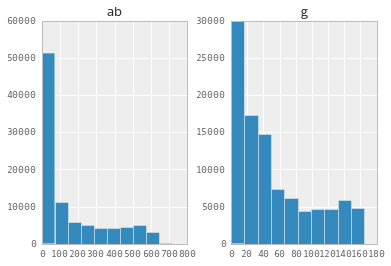

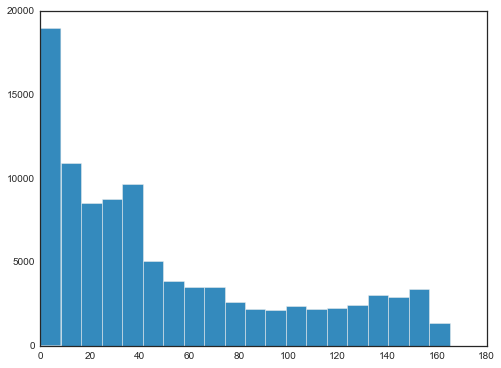

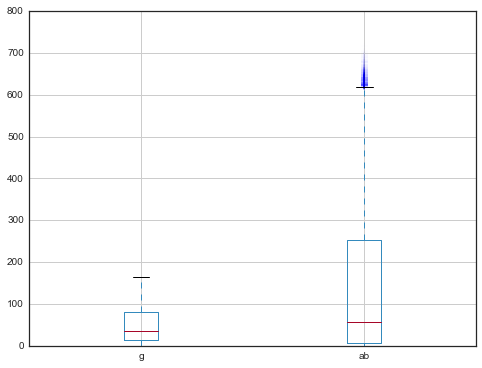

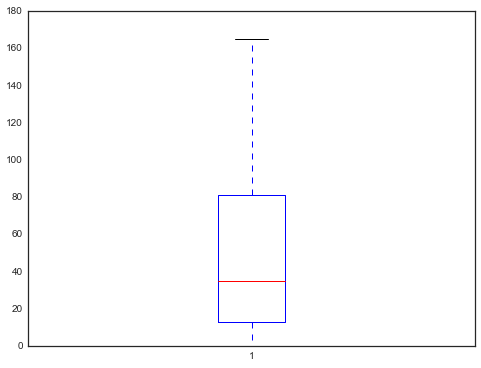

In [29]:
# Always run this line before running matplotlib plt.figure()

## Histograms
# pandas style
df[['g', 'ab']].hist()

# matplotlib style
sns.set_style('white') # sets seaborn "white" to the default matplotlib style
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.hist(df.g, bins=20)

## Boxplots
# pandas style
plt.figure(figsize=(8, 6), dpi=80)
df[['g', 'ab']].boxplot()

# matplotlib style
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.boxplot(df.g)

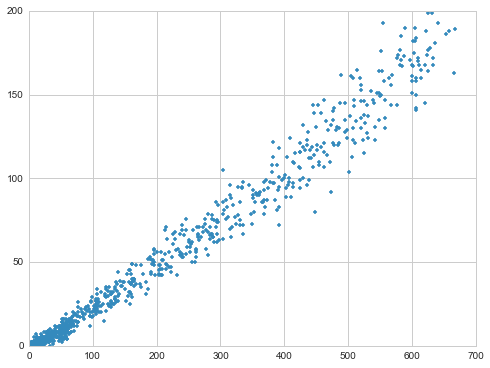

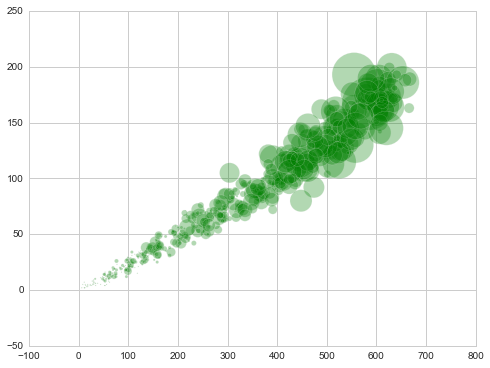

In [34]:
last_year = df[df.year == 2013]
sns.set_style('whitegrid')

# using plot and the '.' notation.
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(last_year.ab, last_year.h, '.')

# using scatter, and setting additional parameters.
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.scatter(last_year.ab, last_year.h, s=last_year.hr**2, alpha=0.3, c='g')

Figure(480x320)


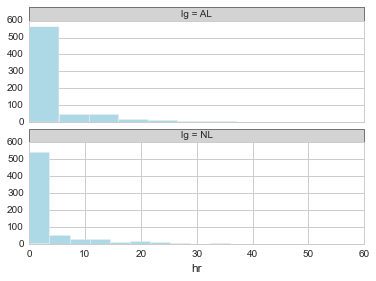

In [36]:
import pandas.tools.rplot as rplot
    
plt.figure()
plot = rplot.RPlot(last_year, x='hr')
plot.add(rplot.TrellisGrid(['lg','.']))
plot.add(rplot.GeomHistogram())
print plot.render(plt.gcf())

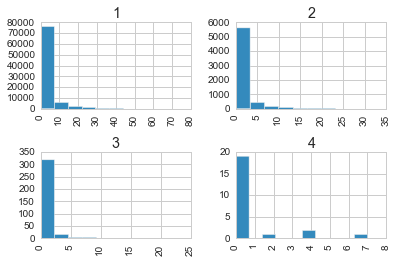

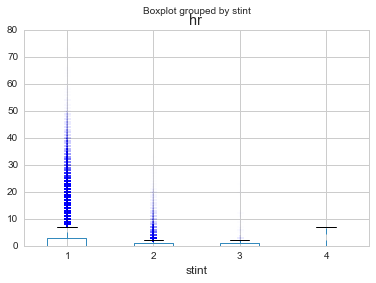

In [37]:
plt.figure()
df[df.stint < 5].hist('hr', by='stint')

plt.figure()
df[df.stint < 5].boxplot('hr', by='stint')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cf84610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10cd9c9d0>]], dtype=object)

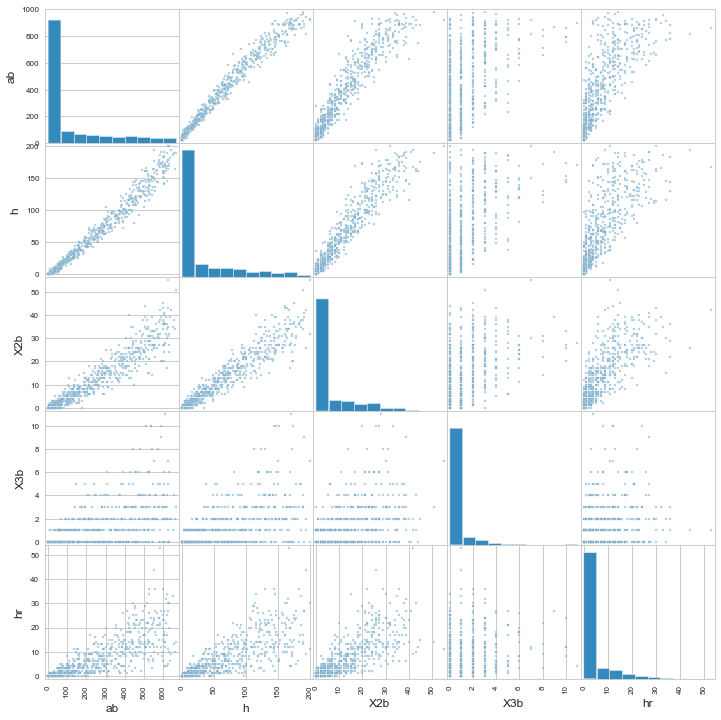

In [38]:
cols = ['ab', 'h', 'X2b', 'X3b', 'hr',]
pd.scatter_matrix(last_year[cols], figsize=(12, 12))

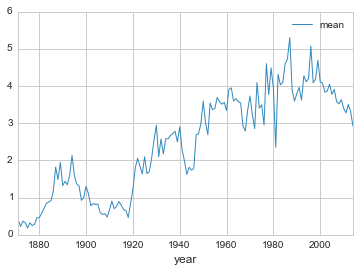

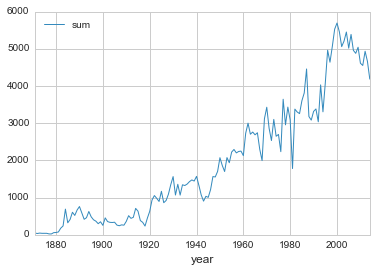

In [39]:
years_grouped = df.groupby('year')

plt.figure()
years_grouped.hr.agg(['mean']).plot()

plt.figure()
years_grouped.hr.agg(['sum']).plot()

In [40]:
from sklearn import datasets
iris = datasets.load_iris()
iris_description = iris.DESCR
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
print iris_description

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

In [59]:
#describe, aggregate, and visualise the iris data set. what's interesting about it?
print irisdf.describe()
print irisdf.groupby('target').describe()

       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)      target
count         150.000000        150.000000         150.000000        150.000000  150.000000
mean            5.843333          3.054000           3.758667          1.198667    1.000000
std             0.828066          0.433594           1.764420          0.763161    0.819232
min             4.300000          2.000000           1.000000          0.100000    0.000000
25%             5.100000          2.800000           1.600000          0.300000    0.000000
50%             5.800000          3.000000           4.350000          1.300000    1.000000
75%             6.400000          3.300000           5.100000          1.800000    2.000000
max             7.900000          4.400000           6.900000          2.500000    2.000000
              petal length (cm)  petal width (cm)  sepal length (cm)  sepal width (cm)
target                                                                               

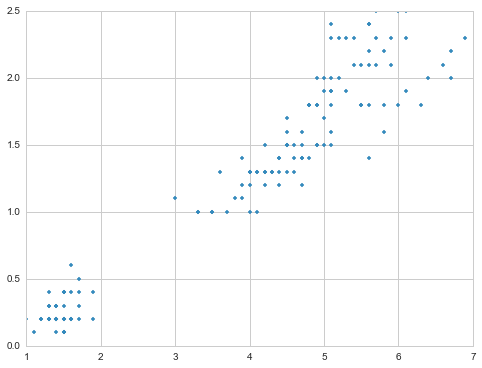

In [52]:
#be able to show both scatterplots and histograms using matplotlib, Trellis, and the scatter_matrix. Use the class target to group by.
#Which flowers are similar? Which seems to be in "its own world?"
#Petal Length by petal width
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(irisdf['petal length (cm)'], irisdf['petal width (cm)'], '.')

(array([  4.,  33.,  11.,   2.,   0.,   0.,   1.,   2.,   3.,   5.,  12.,
         14.,  12.,  17.,   6.,  12.,   7.,   4.,   2.,   3.]),
 array([ 1.   ,  1.295,  1.59 ,  1.885,  2.18 ,  2.475,  2.77 ,  3.065,
         3.36 ,  3.655,  3.95 ,  4.245,  4.54 ,  4.835,  5.13 ,  5.425,
         5.72 ,  6.015,  6.31 ,  6.605,  6.9  ]),
 <a list of 20 Patch objects>)

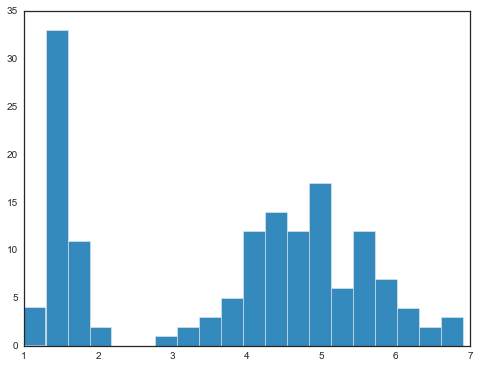

In [54]:
#Petal Length
sns.set_style('white') # sets seaborn "white" to the default matplotlib style
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.hist(irisdf['petal length (cm)'], bins=20)

(array([ 34.,   7.,   7.,   1.,   1.,   0.,   0.,   7.,   3.,   5.,  21.,
         12.,   4.,   2.,  12.,  11.,   6.,   3.,   8.,   6.]),
 array([ 0.1 ,  0.22,  0.34,  0.46,  0.58,  0.7 ,  0.82,  0.94,  1.06,
         1.18,  1.3 ,  1.42,  1.54,  1.66,  1.78,  1.9 ,  2.02,  2.14,
         2.26,  2.38,  2.5 ]),
 <a list of 20 Patch objects>)

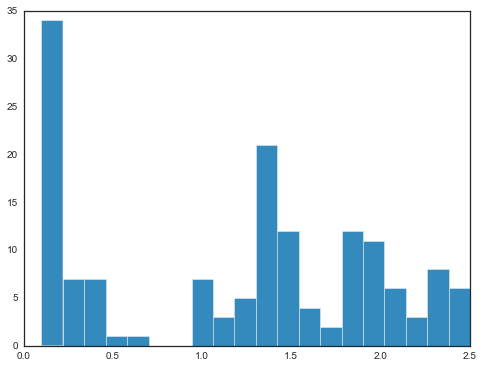

In [55]:
#Petal Width
sns.set_style('white') # sets seaborn "white" to the default matplotlib style
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.hist(irisdf['petal width (cm)'], bins=20)

(array([  1.,   3.,   4.,   3.,   8.,  14.,  14.,  10.,  26.,  12.,  19.,
         12.,   6.,   3.,   9.,   2.,   1.,   1.,   1.,   1.]),
 array([ 2.  ,  2.12,  2.24,  2.36,  2.48,  2.6 ,  2.72,  2.84,  2.96,
         3.08,  3.2 ,  3.32,  3.44,  3.56,  3.68,  3.8 ,  3.92,  4.04,
         4.16,  4.28,  4.4 ]),
 <a list of 20 Patch objects>)

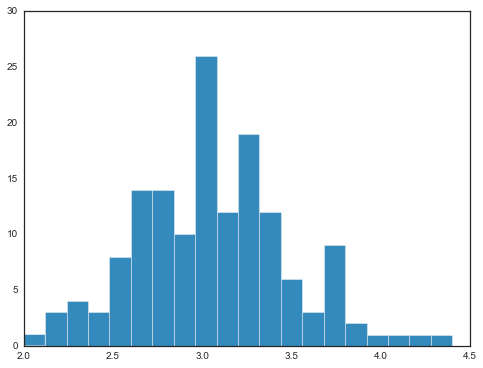

In [56]:
#Sepal Width
sns.set_style('white') # sets seaborn "white" to the default matplotlib style
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.hist(irisdf['sepal width (cm)'], bins=20)

(array([  4.,   5.,   7.,  16.,   9.,   5.,  13.,  14.,  10.,   6.,  10.,
         16.,   7.,  11.,   4.,   2.,   4.,   1.,   5.,   1.]),
 array([ 4.3 ,  4.48,  4.66,  4.84,  5.02,  5.2 ,  5.38,  5.56,  5.74,
         5.92,  6.1 ,  6.28,  6.46,  6.64,  6.82,  7.  ,  7.18,  7.36,
         7.54,  7.72,  7.9 ]),
 <a list of 20 Patch objects>)

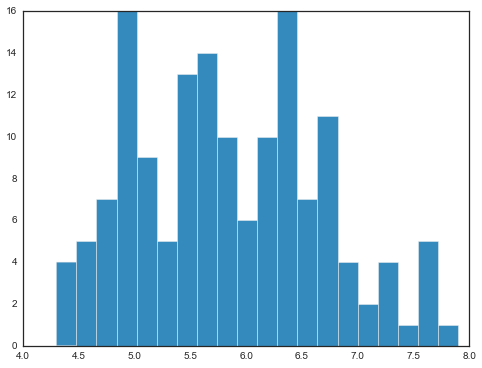

In [57]:
#Sepal Length
sns.set_style('white') # sets seaborn "white" to the default matplotlib style
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
plt.hist(irisdf['sepal length (cm)'], bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113bedd10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114c7c050>]], dtype=object)

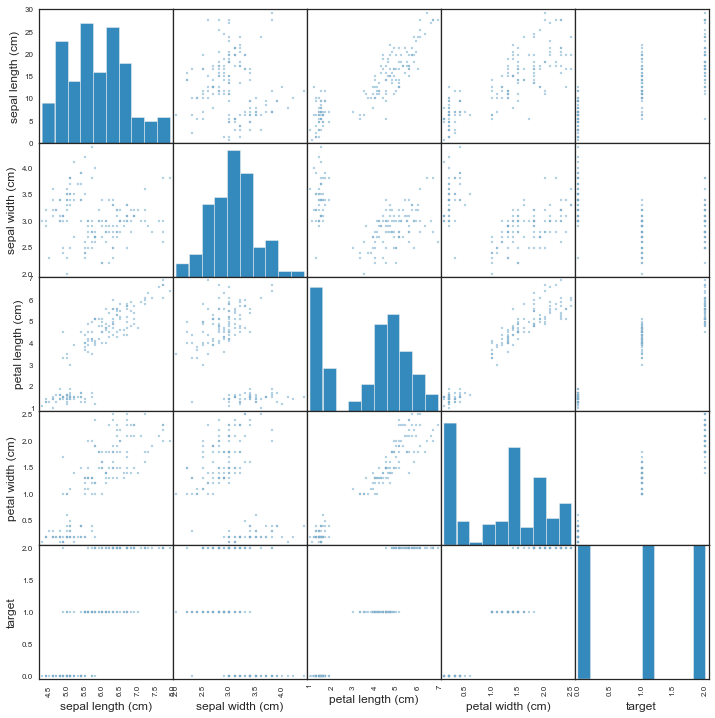

In [60]:
#Write an .apply() function that would "human learn" the three flowers. It would be your best attempt to:
#split the flowers apart using the four columns
#assign either a 1, 2 or 3, similar to target
#test the performance of accuracy by measure how often your results match the original target vs the total count
pd.scatter_matrix(irisdf, figsize=(12, 12))

In [62]:
irisdf['petal_area'] = irisdf['petal length (cm)']*irisdf['petal width (cm)']

def petal_guess(x):
    if(x < 1):
        return 0
    elif(x < 7.5):
        return 1
    else:
        return 2

irisdf['guess'] = irisdf['petal_area'].apply(lambda x: petal_guess(x))